In [1]:
import metaSI
import numpy as np
import torch

$$p_\theta(y|z)$$

In [2]:
from matplotlib import pyplot as plt
def sample():
    if np.random.rand()>0.3:
        return np.random.uniform(-4,-4+8/3)
    else:
        return np.random.uniform(4-8/3,4)
Nb = 10000
ny = None
z = np.zeros((Nb,0))
ymin, ymax = -4, 4
yminplot, ymaxplot = -8, 8
if ny==None:
    ytrain = np.array([sample() for _ in range(Nb)])#np.random.uniform(ymin,ymax,size=Nb)
    yval = np.array([sample() for _ in range(Nb)])#np.random.uniform(ymin,ymax,size=Nb)
train = (z,ytrain)
val = (z,yval)

n_components = 1000
weight_net_kwargs = {'bias_scale':2.0}
loc_net_kwargs = {'bias_scale':0.75}
logscale_net_kwargs = {'bias_scale':0.75}

std before weight_net tensor(2.0068, grad_fn=<StdBackward0>)
std before loc_net tensor(0.7493, grad_fn=<StdBackward0>)
std before logscale_net tensor(0.7392, grad_fn=<StdBackward0>)
std after weight_net tensor(3.1477, grad_fn=<StdBackward0>)
std after loc_net tensor(0.9693, grad_fn=<StdBackward0>)
std after logscale_net tensor(0.8087, grad_fn=<StdBackward0>)


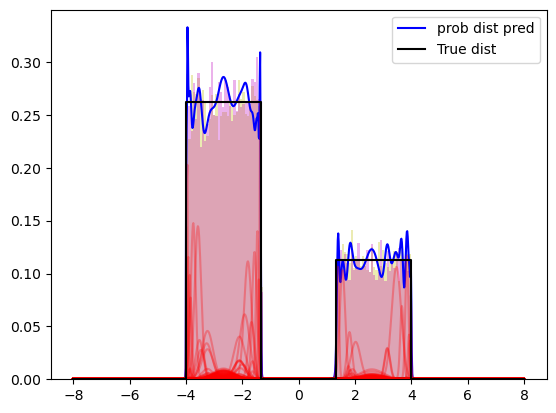

In [3]:
from metaSI.density_networks import Gaussian_mixture_network
from metaSI.data import get_nu_ny_and_auto_norm

from matplotlib import pyplot as plt
def sample():
    if np.random.rand()>0.3:
        return np.random.uniform(-4,-4+8/3)
    else:
        return np.random.uniform(4-8/3,4)
Nb = 10000
ny = None
z = np.zeros((Nb,0))
ymin, ymax = -4, 4
yminplot, ymaxplot = -8, 8
if ny==None:
    ytrain = np.array([sample() for _ in range(Nb)])#np.random.uniform(ymin,ymax,size=Nb)
    yval = np.array([sample() for _ in range(Nb)])#np.random.uniform(ymin,ymax,size=Nb)
train = (z,ytrain)
val = (z,yval)

n_components = 1000
weight_net_kwargs = {'bias_scale':2.0}
loc_net_kwargs = {'bias_scale':0.75}
logscale_net_kwargs = {'bias_scale':0.75}
from metaSI.data.norms import get_nu_ny_and_auto_norm

model = Gaussian_mixture_network(*get_nu_ny_and_auto_norm(*train),n_components=n_components,\
    weight_net_kwargs=weight_net_kwargs, loc_net_kwargs=loc_net_kwargs, logscale_net_kwargs=logscale_net_kwargs)
print('std before weight_net',torch.std(model.weight_net.net_lin.bias))
print('std before loc_net',torch.std(model.loc_net.net_lin.bias))
print('std before logscale_net',torch.std(model.logscale_net.net_lin.bias))
import pickle
load, name = True, 'models/Bimodal-uniform-model-2'
if not load:
    model.fit(train, val, iterations=10_000, print_freq=500)
    pickle.dump(model, open(name,'wb'))
else:
    model = pickle.load(open(name,'rb'))
print('std after weight_net',torch.std(model.weight_net.net_lin.bias))
print('std after loc_net',torch.std(model.loc_net.net_lin.bias))
print('std after logscale_net',torch.std(model.logscale_net.net_lin.bias))

ydist = model.get_dist(torch.zeros(1,0))[0]
ytest = torch.linspace(yminplot,ymaxplot,1000)
yprob_pred = ydist.prob(ytest).detach().numpy() #.sample()
yprob_weighted_pred = ydist.prob_per_weighted(ytest).detach().numpy() #.sample()
plt.plot(ytest, yprob_pred,'b',label='prob dist pred')
plt.plot(ytest, yprob_weighted_pred,'r',alpha=0.3)
# print(model, model.y0, model.ystd)
plt.hist(ytrain,bins=int(Nb**0.5),density=True,alpha=0.3,color='y')
plt.hist(yval,bins=int(Nb**0.5),density=True,alpha=0.3,color='m')
dens1 = 1/(8/3)*(1-0.3)
dens2 = 1/(8/3)*0.3
plt.plot([yminplot,-4,-4,-4+8/3,-4+8/3,4-8/3,4-8/3,4,4,ymaxplot], [0,0,dens1,dens1,0,0,dens2,dens2,0,0],'k',label='True dist')
plt.legend()
plt.show()
# plt.plot(model.iteration_monitor,model.loss_train_monitor)
# plt.plot(model.iteration_monitor,model.loss_val_monitor)
# plt.grid()
# plt.show()


## No input multiple ouputs

std before weight_net tensor(1.3810, grad_fn=<StdBackward0>)
std before loc_net tensor(0.7520, grad_fn=<StdBackward0>)
std before logscale_net tensor(0.7416, grad_fn=<StdBackward0>)
std after weight_net tensor(2.6537, grad_fn=<StdBackward0>)
std after loc_net tensor(0.9226, grad_fn=<StdBackward0>)
std after logscale_net tensor(0.9433, grad_fn=<StdBackward0>)


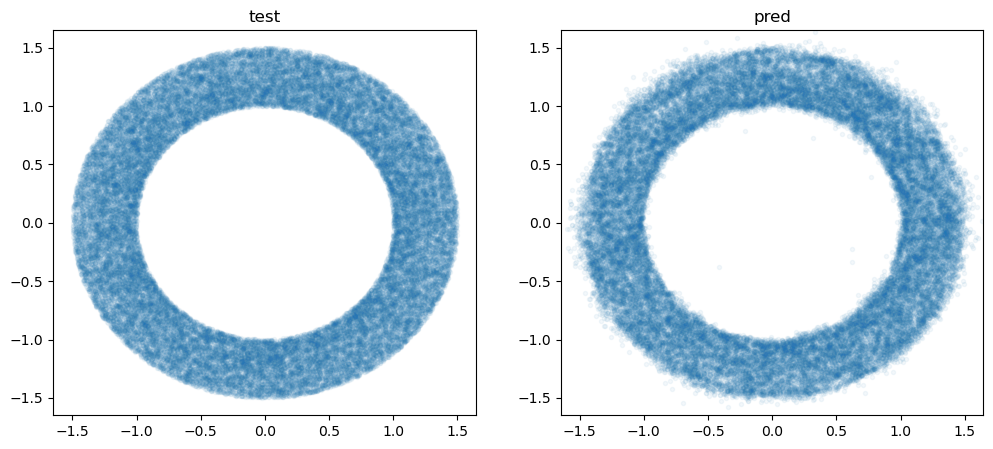

In [4]:
from matplotlib import pyplot as plt
def sample(n=1):
    if n!=1:
        return np.array([sample() for _ in range(n)])
    th = np.random.rand()*np.pi*2
    r = np.random.uniform(1,1.5)
    return np.array([r*np.cos(th),r*np.sin(th)])
Nb = 100_000
ny = 2
z = np.zeros((Nb,0))
ymin, ymax = -4, 4
yminplot, ymaxplot = -8, 8
if not (ny==None):
    # ytrain = np.random.uniform(ymin,ymax,size=(Nb,ny))
    # yval = np.random.uniform(ymin,ymax,size=(Nb,ny))
    # th = np.pi/4
    # ytrain = ytrain@np.array([[np.cos(th),-np.sin(th)],[np.sin(th),np.cos(th)]])
    # yval = yval@np.array([[np.cos(th),-np.sin(th)],[np.sin(th),np.cos(th)]])
    ytrain = sample(Nb)
    yval = sample(int(Nb/5))
train = (np.zeros((len(ytrain),0)),ytrain)
val = (np.zeros((len(yval),0)),yval)

n_components = 200
weight_net_kwargs = {'bias_scale':1.5} #not critical for good performance
loc_net_kwargs = {'bias_scale':0.75}
logscale_net_kwargs = {'bias_scale':0.75}
logscale_od_net = metaSI.utils.networks.MLP_res_net #None for 

model = Gaussian_mixture_network(*metaSI.data.get_nu_ny_and_auto_norm(*train),n_components=n_components,\
        weight_net_kwargs=weight_net_kwargs, \
        loc_net_kwargs=loc_net_kwargs, \
        logscale_net_kwargs=logscale_net_kwargs, \
        logscale_od_net=logscale_od_net) #weights
print('std before weight_net',torch.std(model.weight_net.net_lin.bias))
print('std before loc_net',torch.std(model.loc_net.net_lin.bias))
print('std before logscale_net',torch.std(model.logscale_net.net_lin.bias))
import pickle
load, name = True, f'models/uniform-donut-ny-{ny}-model-off-diagonal-2'
if not load:
    model.fit(train, val, iterations=10_000, print_freq=500)
    pickle.dump(model, open(name,'wb'))
else:
    model = pickle.load(open(name,'rb'))
print('std after weight_net',torch.std(model.weight_net.net_lin.bias))
print('std after loc_net',torch.std(model.loc_net.net_lin.bias))
print('std after logscale_net',torch.std(model.logscale_net.net_lin.bias))

ydist = model.get_dist(torch.zeros(1,0))[0]
Nbtest = 40_000
samp = ydist.sample(Nbtest)
ytest = sample(Nbtest)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(*ytest.T,'.',alpha=0.05)
plt.title('test')
xlim, ylim = plt.xlim(), plt.ylim()
plt.subplot(1,2,2)
plt.plot(*samp.numpy().T,'.',alpha=0.05)
plt.title('pred')
plt.xlim(xlim), plt.ylim(ylim)
plt.show()

## 1 input 1 output

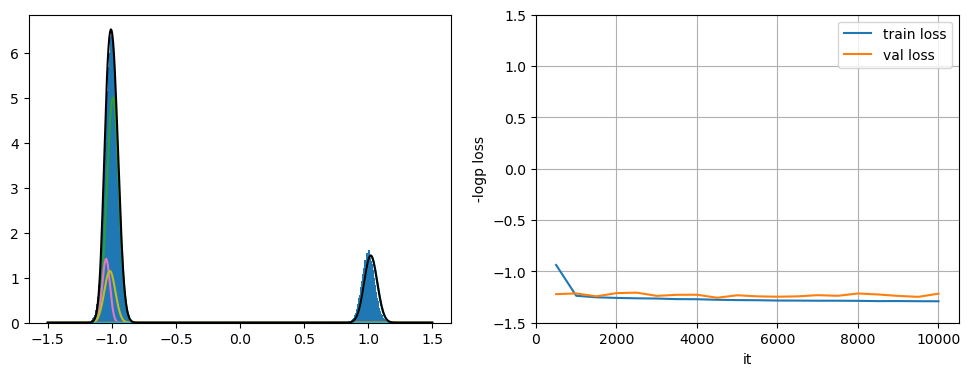

mean neg log p of dist tensor(-0.4932)
mean neg log p of normal tensor(0.7442)
difference=  tensor(-1.2374)


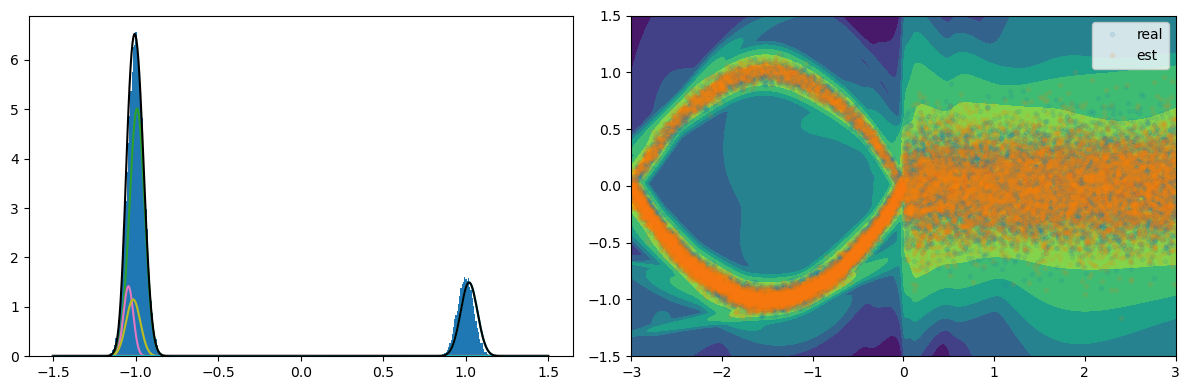

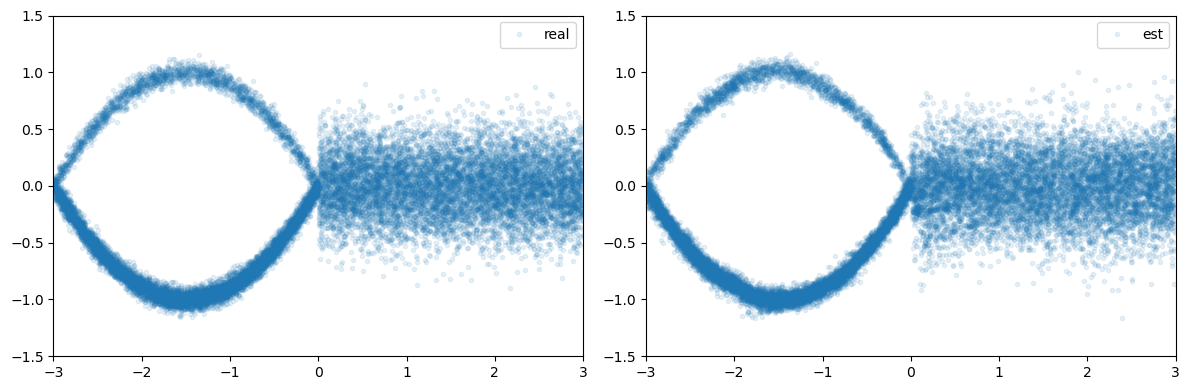

In [7]:
def sample_exp(x):
    if x<0:
        if np.random.rand()<0.2: #above:
            return np.random.normal(loc=-(x+3)*x/1.5**2,scale=0.05)
        else:
            return np.random.normal(loc=+(x+3)*x/1.5**2,scale=0.05)
    else:
        return np.random.normal(0,0.25)
def get_data(N, seed=32, sample = sample_exp):
    rng = np.random.RandomState(seed=seed)
    Z_full = rng.uniform(-3,3,size=N)
    Y_full = np.array([sample(zi) for zi in Z_full])
    return Z_full, Y_full

train = get_data(4000, seed=32) #has more data! changed it from 4000 due to overfitting
val = get_data(500, seed=33)
test = get_data(20000, seed=34)

from matplotlib import pyplot as plt

n_components = 20
model = Gaussian_mixture_network(*metaSI.data.get_nu_ny_and_auto_norm(*train), n_components=n_components)

import pickle
load, name = True, 'models/toy-example-depedent-static-dist-model-3'
if not load:
    model.fit(train, val, iterations=10_000, print_freq=500)
    pickle.dump(model, open(name,'wb'))
else:
    model = pickle.load(open(name,'rb'))
model.checkpoint_load('lowest_train_loss') #early stopping is important!
plt.plot(model.iteration_monitor,model.loss_train_monitor,label='train loss')
plt.plot(model.iteration_monitor,model.loss_val_monitor,label='val loss')
plt.grid()
plt.xlabel('it')
plt.ylabel('-logp loss')
plt.legend()
plt.show()


ztest = torch.as_tensor(test[0],dtype=torch.float32)
ytest = torch.as_tensor(test[1],dtype=torch.float32)
ydist = model.get_dist(ztest)
zlinspace = torch.linspace(-3,3,500)
ylinspace = torch.linspace(-1.5,1.5,501)
ydist_linspace = model.get_dist(zlinspace)
ztest_point = torch.tensor([-1.5])

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(ylinspace, model.get_dist(ztest_point)[0].prob_per_weighted(ylinspace).detach().numpy())
plt.plot(ylinspace, model.get_dist(ztest_point)[0].prob(ylinspace).detach().numpy(),'k')
plt.hist([sample_exp(-1.5) for _ in range(10**5)], bins=int(10**(5/2)),density=True)
# plt.show()
logplinspace = ydist_linspace.log_prob(ylinspace[:,None])
plt.subplot(1,2,2)
plt.contourf(zlinspace.numpy(), ylinspace.numpy(), logplinspace.detach().numpy())
# plt.show()

ydist0 = metaSI.distributions.Mixture_normals(locs=torch.mean(ytest)[None], scales=torch.std(ytest)[None], weights=torch.ones(1))
meanneglogp = torch.mean(-ydist.log_prob(ytest).detach())
meanneglogpnormal = torch.mean(-ydist0.log_prob(ytest).detach())
print('mean neg log p of dist', meanneglogp)
print('mean neg log p of normal', meanneglogpnormal)
print('difference= ',meanneglogp-meanneglogpnormal)

ysamp = ydist.sample()

plt.plot(ztest.numpy(), ytest.detach().numpy(),'.',alpha=0.1,label='real')
plt.plot(ztest.numpy(), ysamp.detach().numpy(),'.',alpha=0.1,label='est')
plt.ylim(-1.5, 1.5)
plt.xlim(-3,3)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(ztest.numpy(), ytest.detach().numpy(),'.',alpha=0.1,label='real')
plt.legend()
plt.ylim(-1.5, 1.5)
plt.xlim(-3,3)
plt.subplot(1,2,2)
plt.plot(ztest.numpy(), ysamp.detach().numpy(),'.',alpha=0.1,label='est')
plt.ylim(-1.5, 1.5)
plt.xlim(-3,3)
plt.legend()
plt.tight_layout()
plt.show()


## Thin probability distribution test

In [8]:
sigma_y = 0.00001 #10^-5 has problems
sigma_y = 1e-6 #10^-5 has problems

from matplotlib import pyplot as plt
Nb = 10000
ny = None
z = np.zeros((Nb,0))
yminplot, ymaxplot = -sigma_y*4, sigma_y*4
if ny==None:
    ytrain = np.random.normal(scale=sigma_y, size=Nb)#np.random.uniform(ymin,ymax,size=Nb)
    yval = np.random.normal(scale=sigma_y, size=Nb)#np.random.uniform(ymin,ymax,size=Nb)
train = (z,ytrain)
val = (z,yval)

std before weight_net tensor(1.2232, grad_fn=<StdBackward0>)
std before loc_net tensor(0.8452, grad_fn=<StdBackward0>)
std before logscale_net tensor(0.8704, grad_fn=<StdBackward0>)
Number of datapoints: 10000 	Batch size:  256 	Iterations per epoch: 39


  0%|          | 1/50000 [00:00<?, ?it/s]

std 2.158916711807251
old 0.001
new 0.001


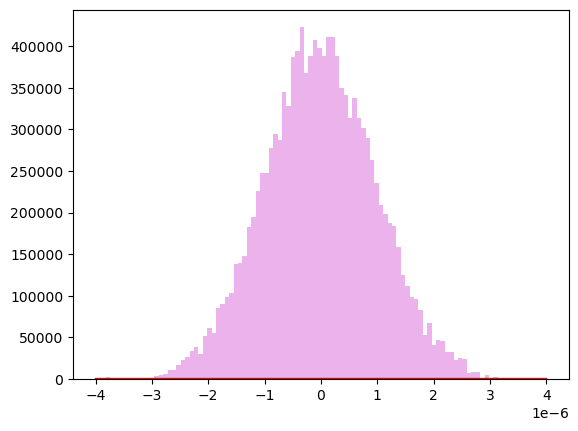

it     500 loss 0.300! loss val -0.278!
std 1.5501577854156494
old 0.001
new 0.001


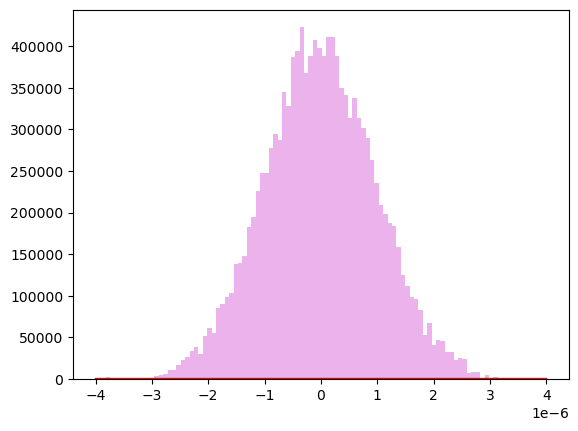

it   1,000 loss -1.038! loss val -1.778!
std 1.157078742980957
old 0.001
new 0.001


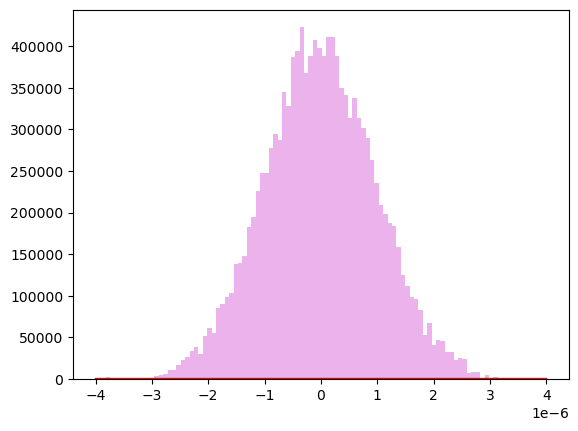

it   1,500 loss -2.378! loss val -2.905!
std 0.891503632068634
old 0.001
new 0.001


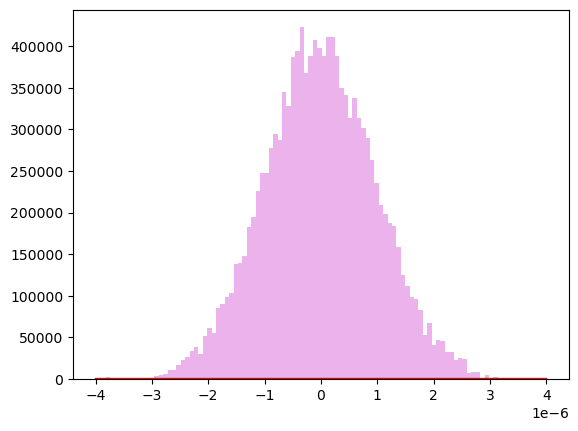

it   2,000 loss -3.322! loss val -3.704!
std 0.7112473249435425
old 0.001
new 0.001


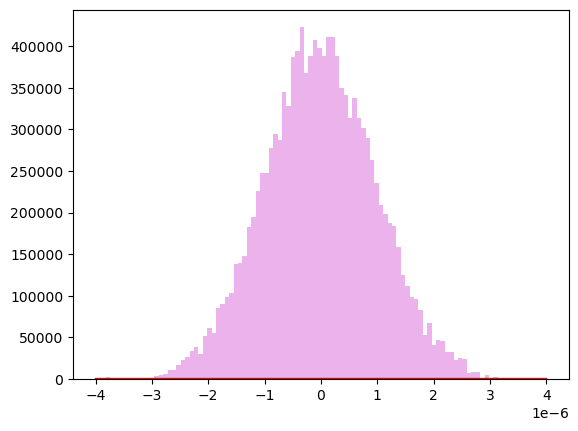

it   2,500 loss -4.037! loss val -4.355!
std 0.5835879445075989
old 0.001
new 0.001


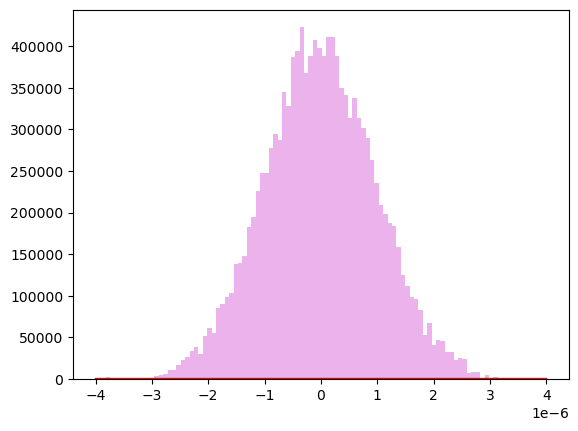

it   3,000 loss -4.650! loss val -4.939!
std 0.4887741506099701
old 0.001
new 0.001


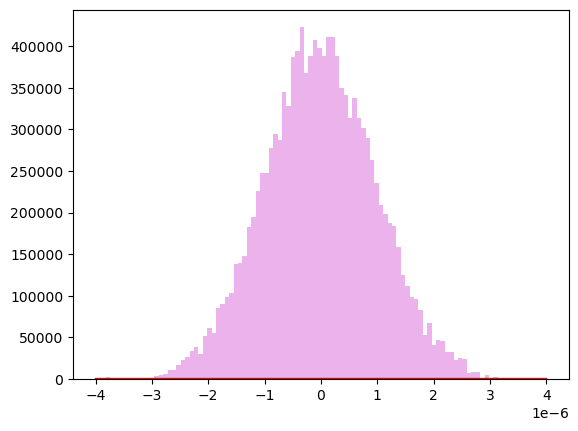

it   3,500 loss -5.215! loss val -5.488!
std 0.41547054052352905
old 0.001
new 0.001


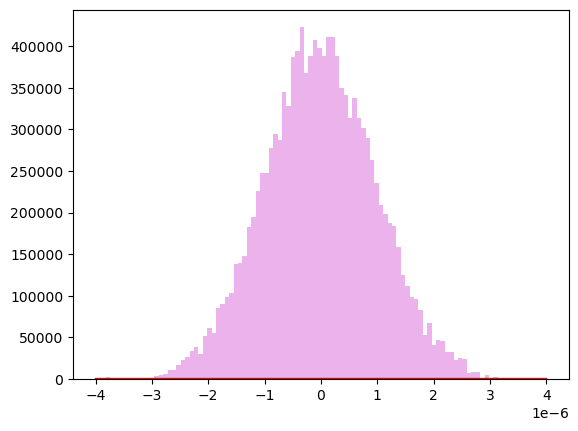

it   4,000 loss -5.754! loss val -6.019!
std 0.3569842576980591
old 0.001
new 0.001


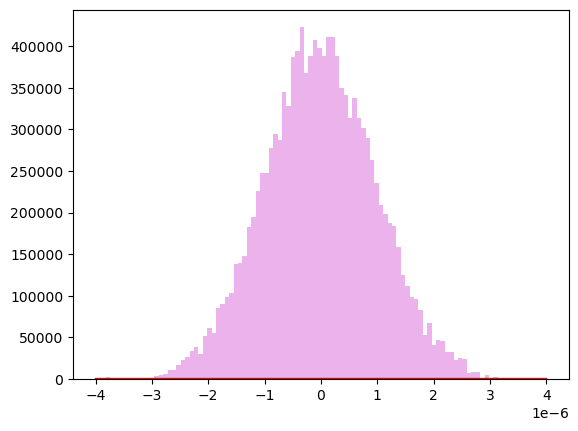

it   4,500 loss -6.279! loss val -6.539!
std 0.30917325615882874
old 0.001
new 0.001


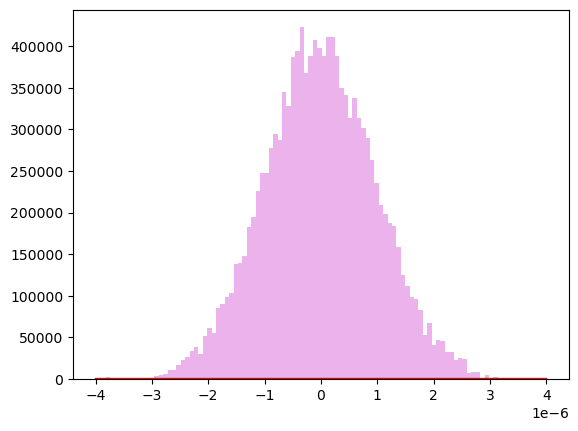

it   5,000 loss -6.795! loss val -7.053!
std 0.2693534791469574
old 0.001
new 0.001


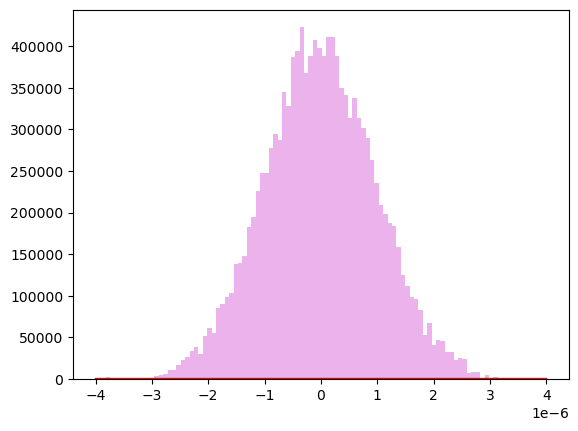

it   5,500 loss -7.305! loss val -7.548!
std 0.2357185333967209
old 0.001
new 0.001


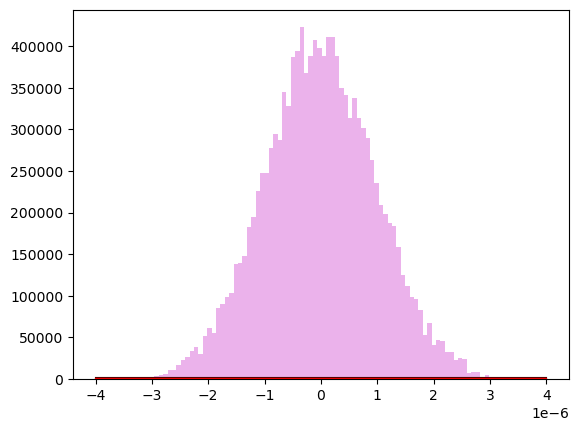

it   6,000 loss -7.808! loss val -8.065!
std 0.20698486268520355
old 0.001
new 0.001


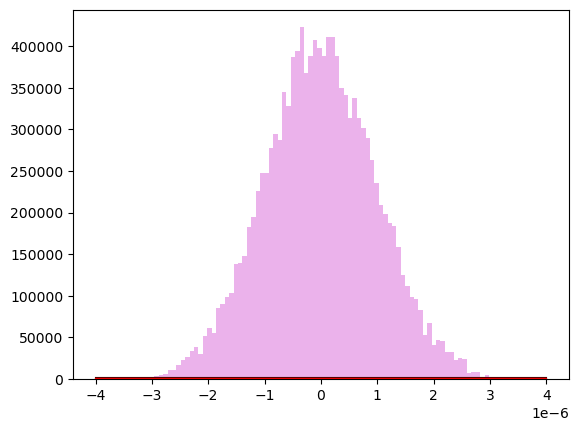

it   6,500 loss -8.300! loss val -8.561!
std 0.182228222489357
old 0.001
new 0.000911141112446785


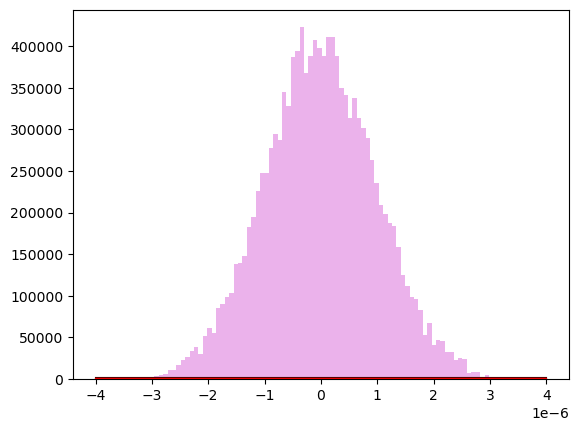

it   7,000 loss -8.771! loss val -8.963!
std 0.16237623989582062
old 0.000911141112446785
new 0.0008118811994791031


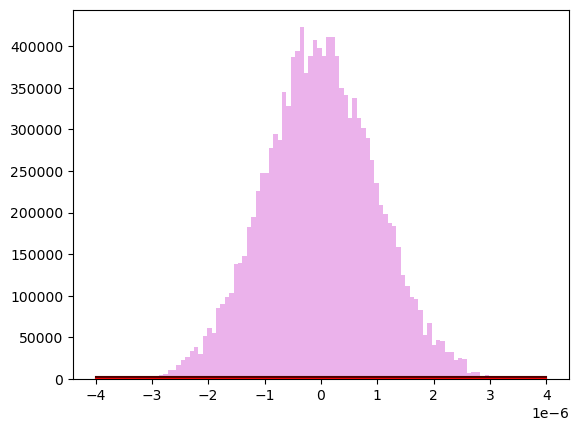

it   7,500 loss -9.197! loss val -9.461!
std 0.14627450704574585
old 0.0008118811994791031
new 0.0007313725352287293


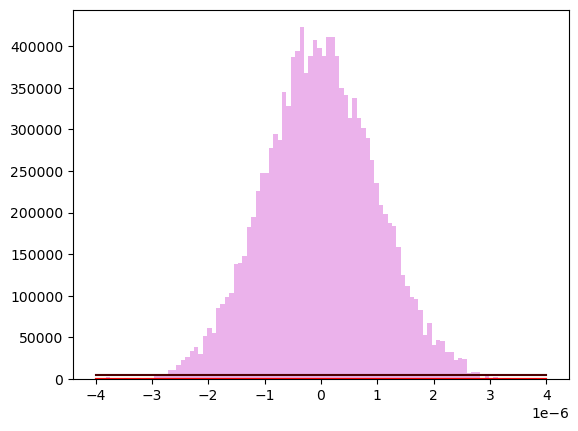

it   8,000 loss -9.555! loss val -9.810!
std 0.13272660970687866
old 0.0007313725352287293
new 0.0006636330485343934


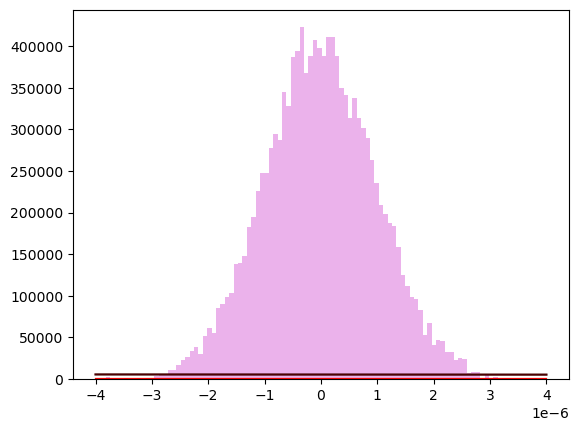

it   8,500 loss -9.853! loss val -10.029!
std 0.1210489496588707
old 0.0006636330485343934
new 0.0006052447482943535


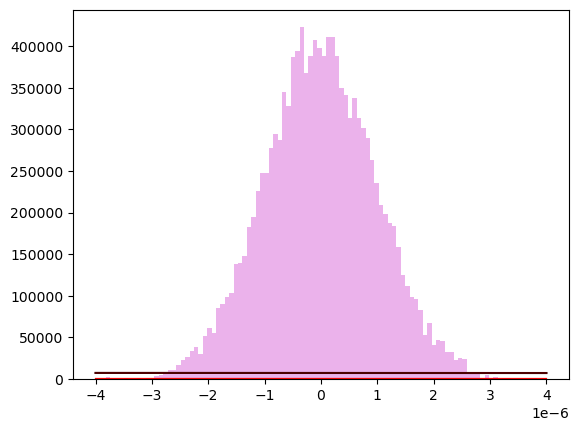

it   9,000 loss -10.079! loss val -10.326!
std 0.11081752926111221
old 0.0006052447482943535
new 0.000554087646305561


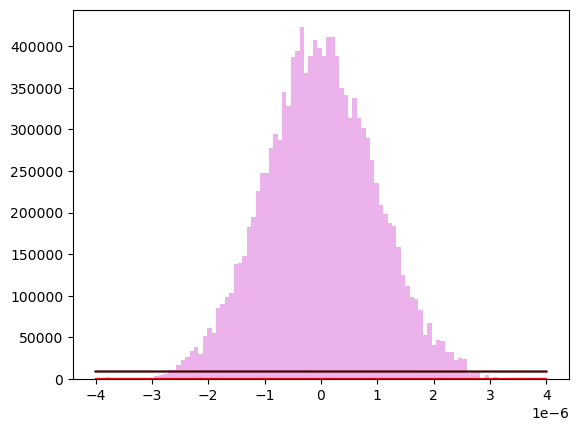

it   9,500 loss -10.333! loss val -10.540!
std 0.10174891352653503
old 0.000554087646305561
new 0.0005087445676326752


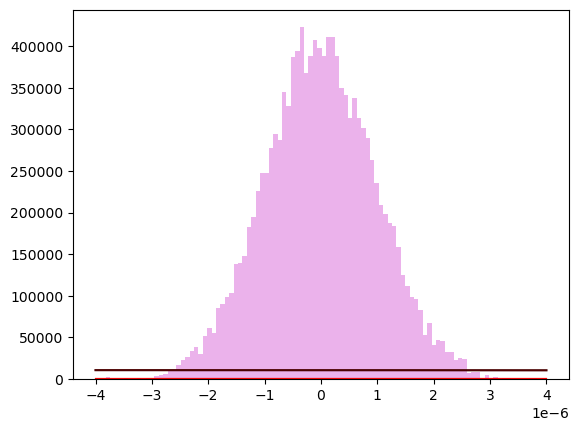

it  10,000 loss -10.459! loss val -10.701!
std 0.09364563226699829
old 0.0005087445676326752
new 0.0004682281613349915


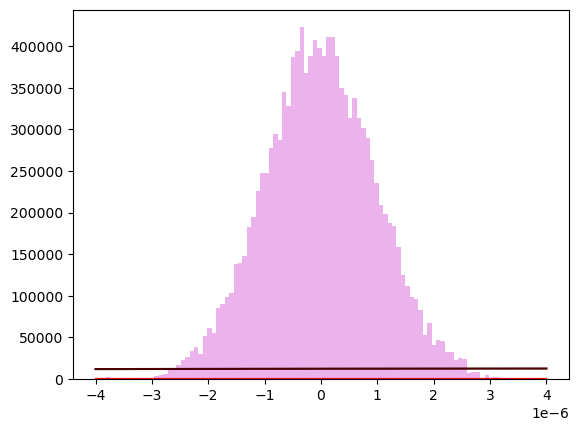

it  10,500 loss -10.672! loss val -10.848!
std 0.08636239916086197
old 0.0004682281613349915
new 0.0004318119958043099


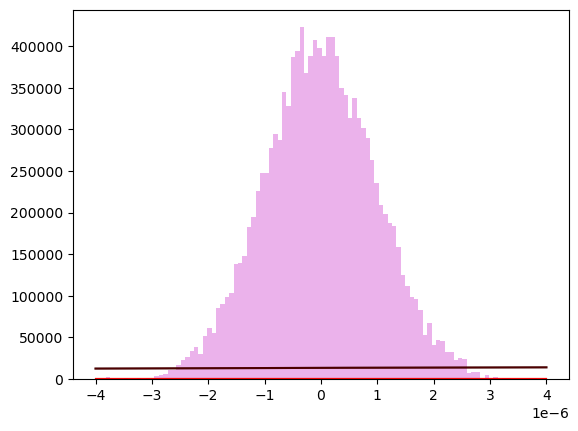

it  11,000 loss -10.771! loss val -10.929!
std 0.07978878170251846
old 0.0004318119958043099
new 0.0003989439085125923


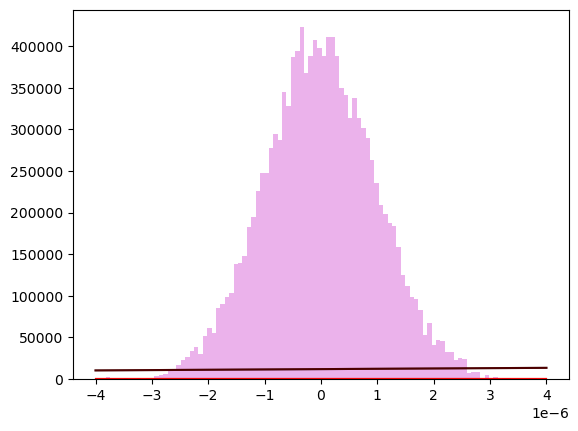

it  11,500 loss -10.887! loss val -10.814 
std 0.07383742183446884
old 0.0003989439085125923
new 0.0003691871091723442


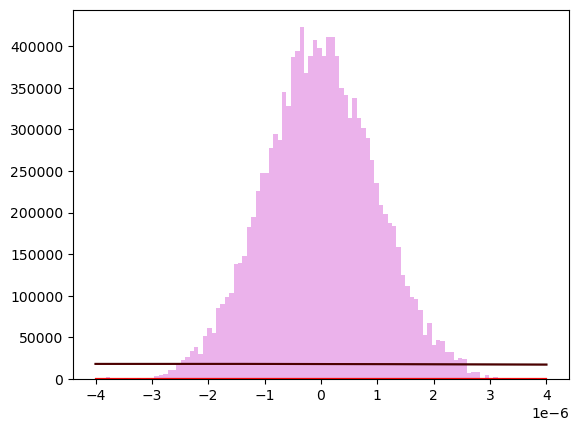

it  12,000 loss -11.003! loss val -11.223!
std 0.06843800097703934
old 0.0003691871091723442
new 0.0003421900048851967


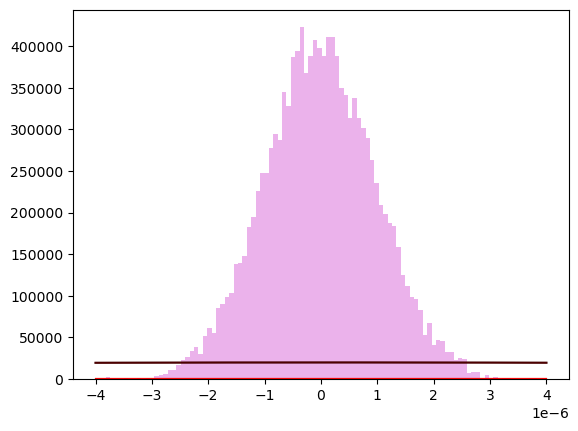

it  12,500 loss -11.078! loss val -11.322!
std 0.06353236734867096
old 0.0003421900048851967
new 0.0003176618367433548


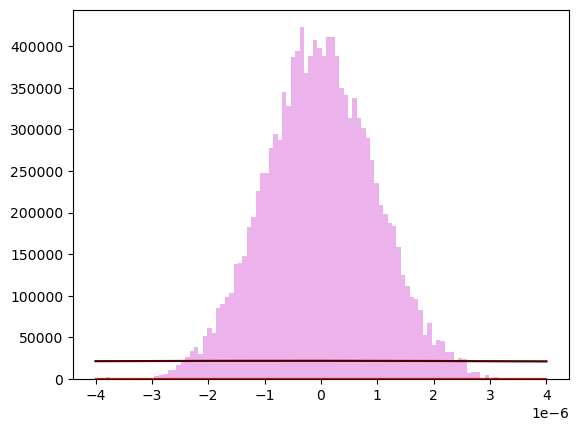

it  13,000 loss -11.216! loss val -11.414!
std 0.05907030031085014
old 0.0003176618367433548
new 0.0002953515015542507


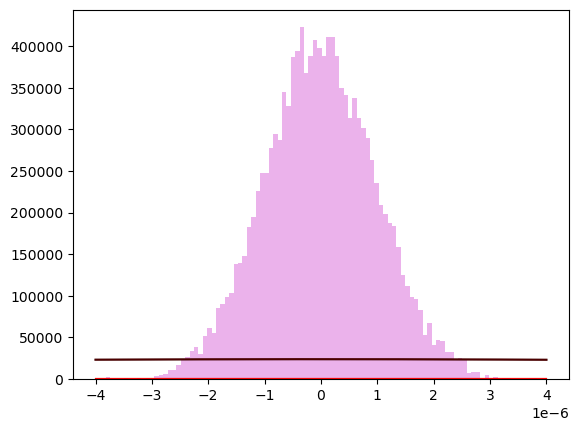

it  13,500 loss -11.279! loss val -11.500!
std 0.05500846728682518
old 0.0002953515015542507
new 0.0002750423364341259


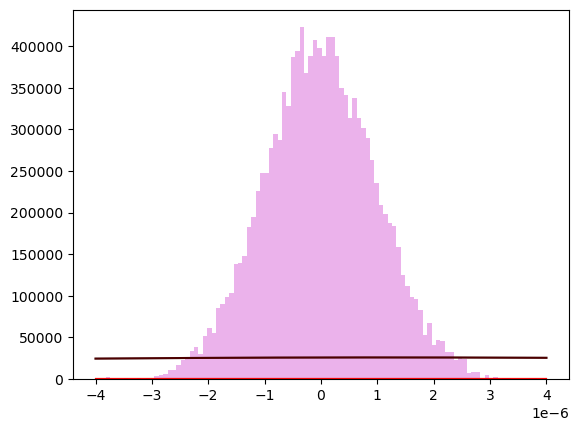

it  14,000 loss -11.376! loss val -11.580!
std 0.051308464258909225
old 0.0002750423364341259
new 0.00025654232129454616


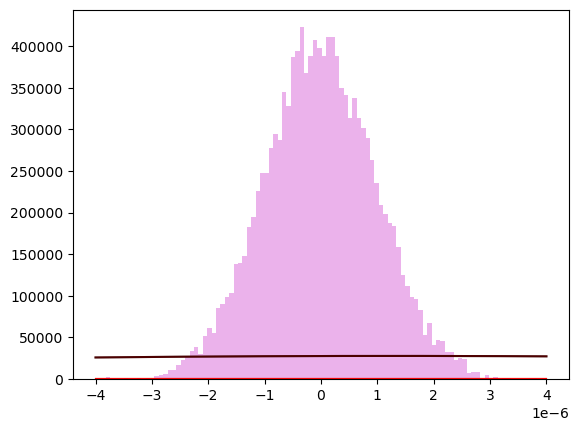

it  14,500 loss -11.406! loss val -11.646!
std 0.04793691635131836
old 0.00025654232129454616
new 0.0002396845817565918


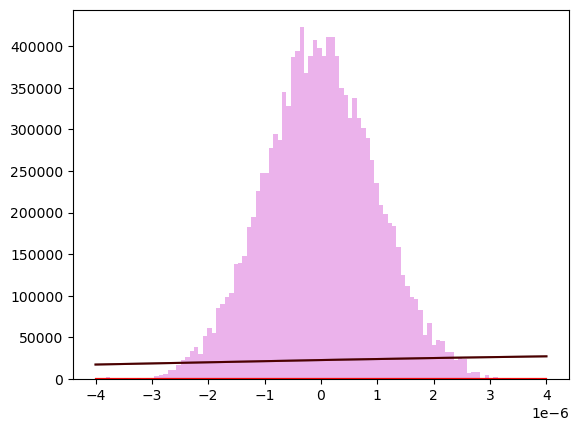

it  15,000 loss -11.566! loss val -11.454 
std 0.04486273601651192
old 0.0002396845817565918
new 0.0002243136800825596


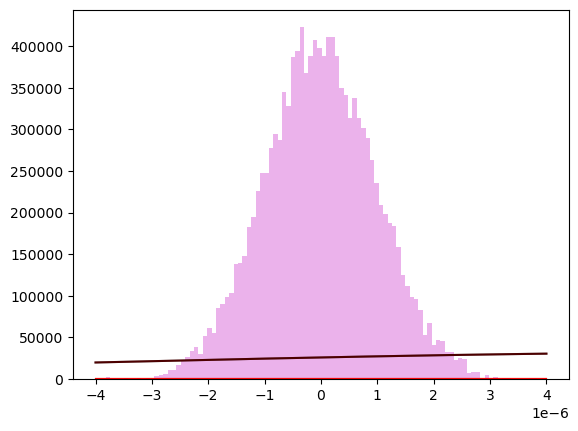

it  15,500 loss -11.607! loss val -11.582 
std 0.042058322578668594
old 0.0002243136800825596
new 0.00021029161289334297


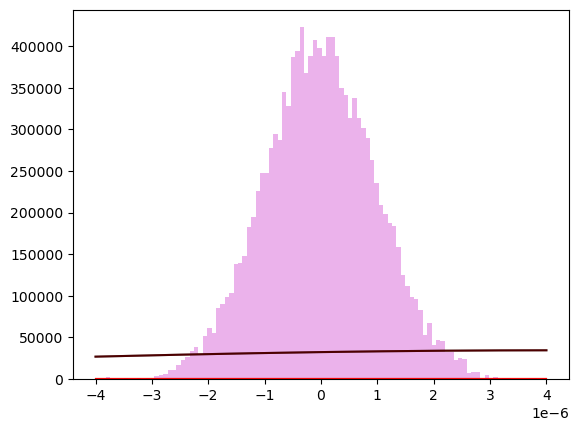

it  16,000 loss -11.671! loss val -11.802!
std 0.03949839249253273
old 0.00021029161289334297
new 0.00019749196246266365


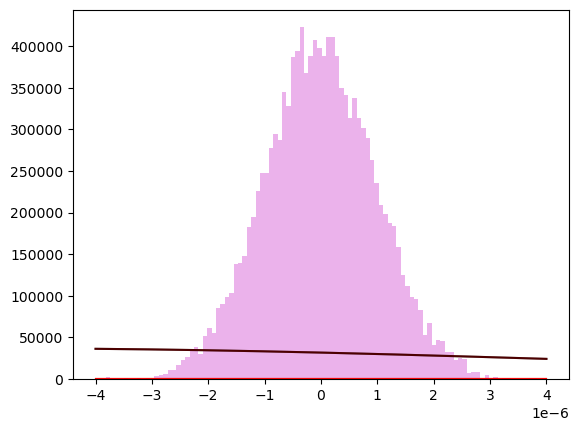

it  16,500 loss -11.733! loss val -11.784 
std 0.03716006502509117
old 0.00019749196246266365
new 0.00018580032512545587


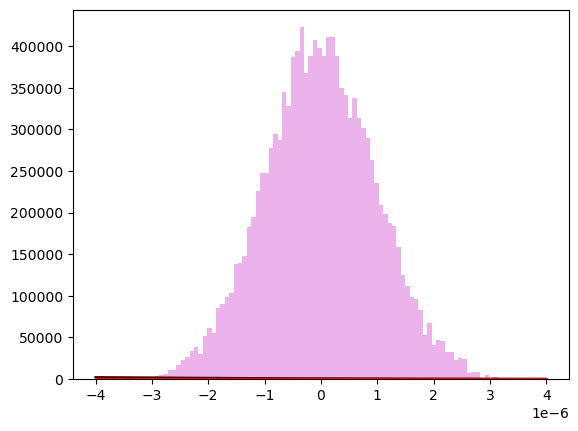

it  17,000 loss -11.795! loss val -8.184 
std 0.03502245619893074
old 0.00018580032512545587
new 0.0001751122809946537


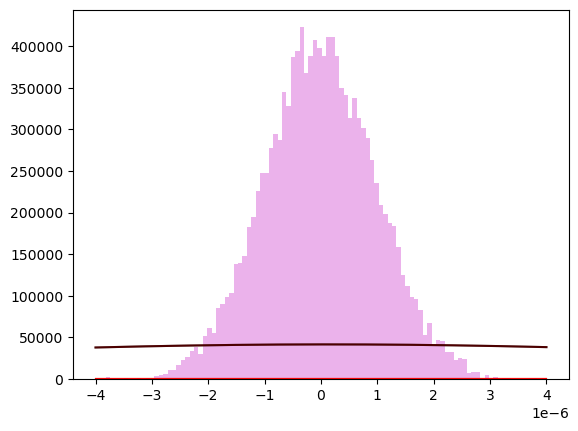

it  17,500 loss -11.871! loss val -12.051!
std 0.03306625410914421
old 0.0001751122809946537
new 0.00016533127054572106


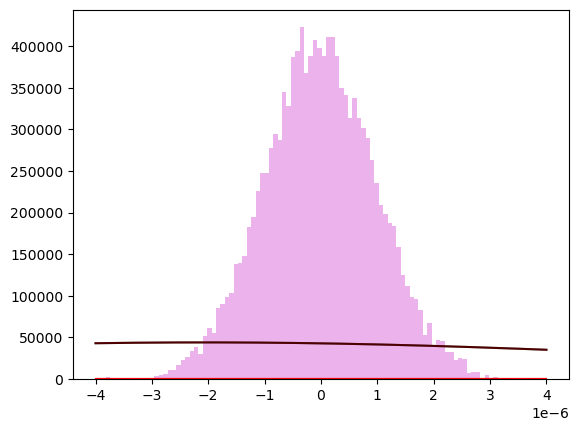

it  18,000 loss -11.916! loss val -12.081!
std 0.031274132430553436
old 0.00016533127054572106
new 0.00015637066215276718


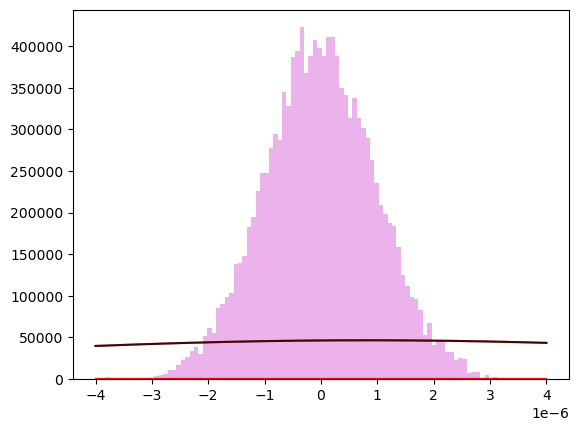

it  18,500 loss -11.988! loss val -12.158!
std 0.02963016740977764
old 0.00015637066215276718
new 0.0001481508370488882


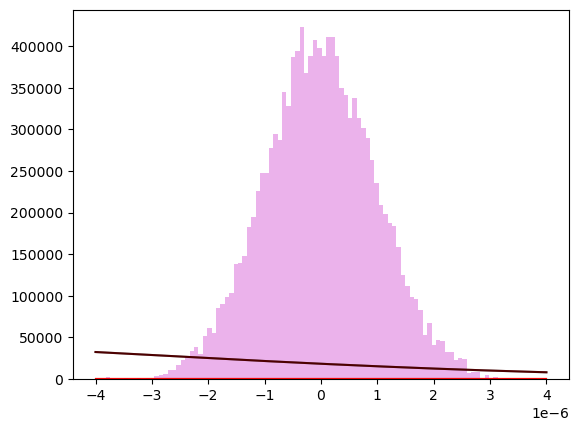

it  19,000 loss -12.026! loss val -11.235 
std 0.02812044322490692
old 0.0001481508370488882
new 0.00014060221612453462


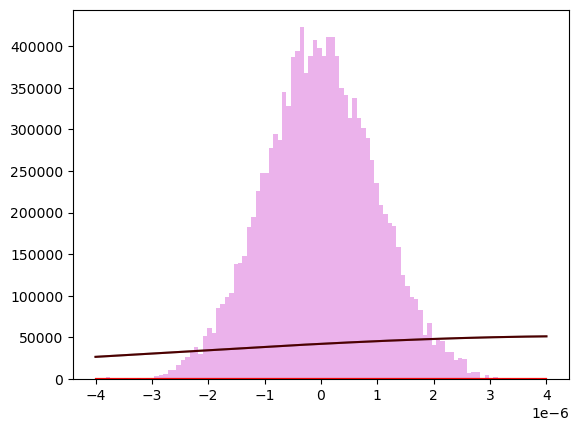

it  19,500 loss -12.099! loss val -12.064 
std 0.026731695979833603
old 0.00014060221612453462
new 0.00013365847989916803


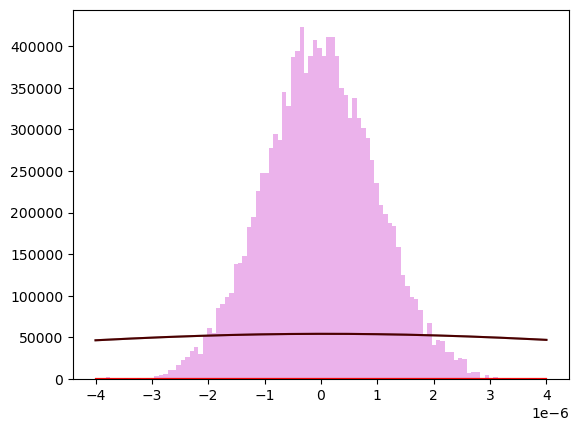

it  20,000 loss -12.138! loss val -12.313!
std 0.025452416390180588
old 0.00013365847989916803
new 0.00012726208195090293


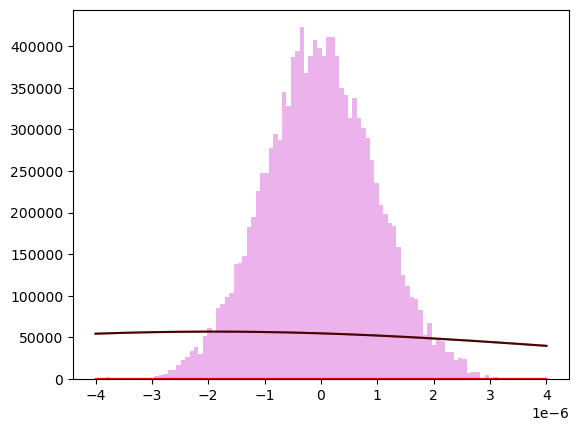

it  20,500 loss -12.167! loss val -12.323!
std 0.024271758273243904
old 0.00012726208195090293
new 0.00012135879136621953


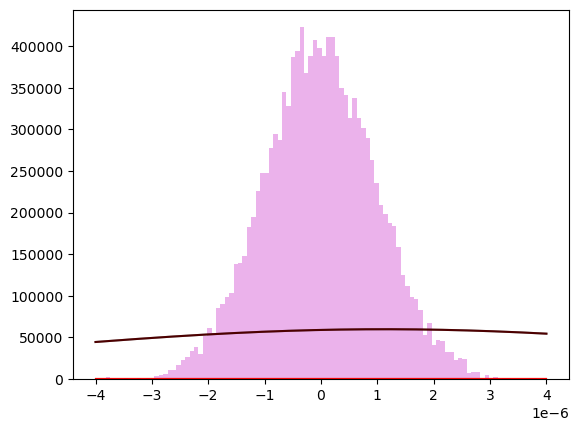

it  21,000 loss -12.248! loss val -12.393!
std 0.023180633783340454
old 0.00012135879136621953
new 0.00011590316891670227


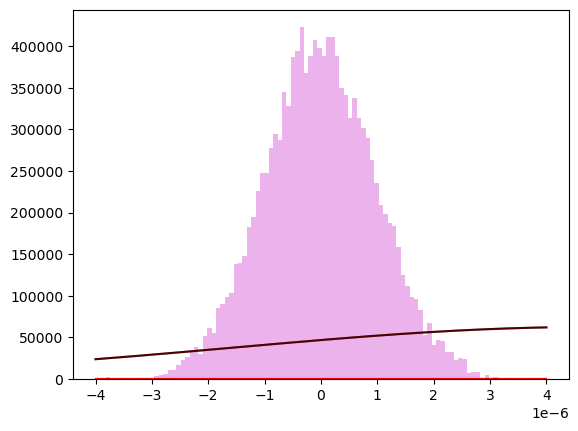

it  21,500 loss -12.285! loss val -12.161 
std 0.022170396521687508
old 0.00011590316891670227
new 0.00011085198260843754


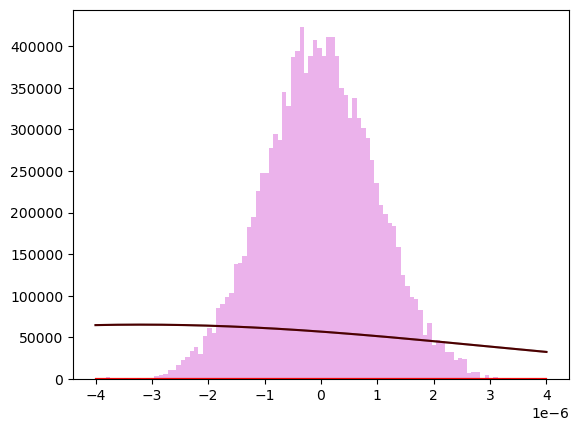

it  22,000 loss -12.314! loss val -12.358 
std 0.02123381197452545
old 0.00011085198260843754
new 0.00010616905987262726


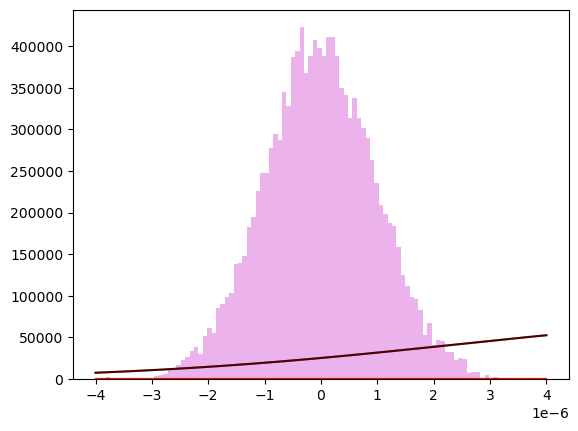

it  22,500 loss -12.385! loss val -11.542 
std 0.020363882184028625
old 0.00010616905987262726
new 0.00010181941092014314


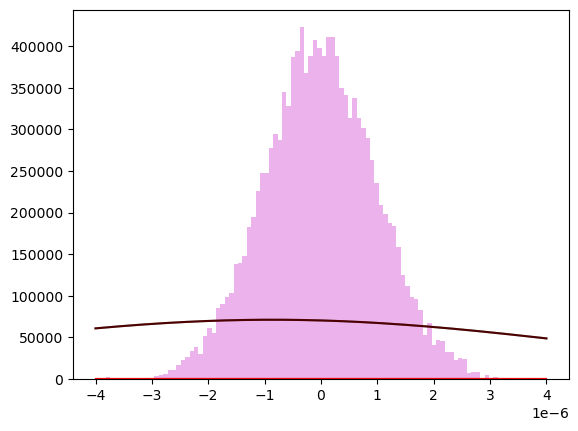

it  23,000 loss -12.408! loss val -12.566!
std 0.01955428346991539
old 0.00010181941092014314
new 9.777141734957696e-05


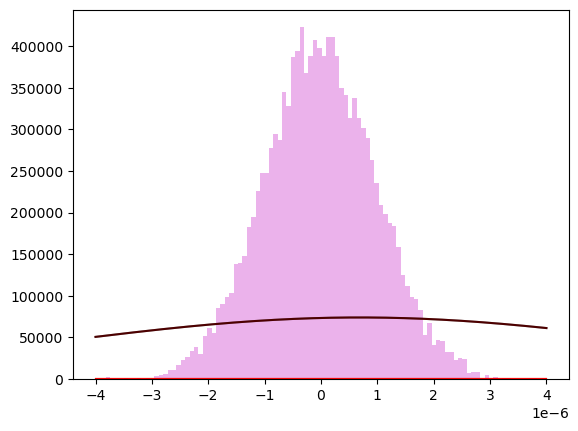

it  23,500 loss -12.428! loss val -12.605!
std 0.01879984512925148
old 9.777141734957696e-05
new 9.399922564625741e-05


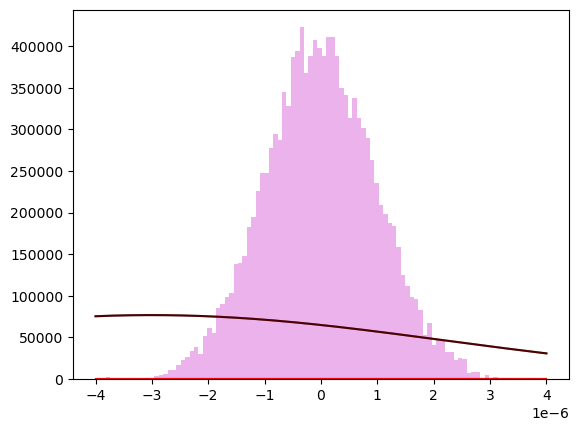

it  24,000 loss -12.506! loss val -12.484 
std 0.01809542439877987
old 9.399922564625741e-05
new 9.047712199389935e-05


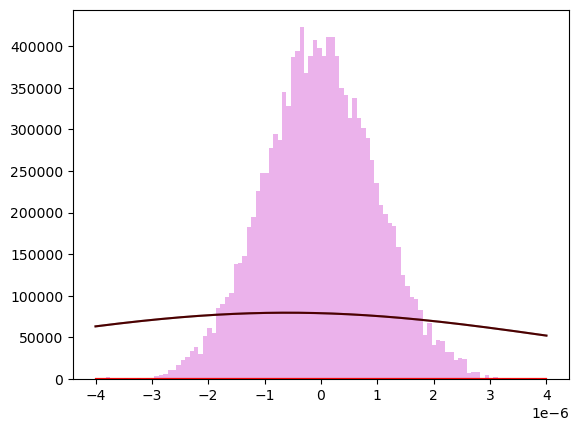

it  24,500 loss -12.532! loss val -12.679!
std 0.017436860129237175
old 9.047712199389935e-05
new 8.718430064618588e-05


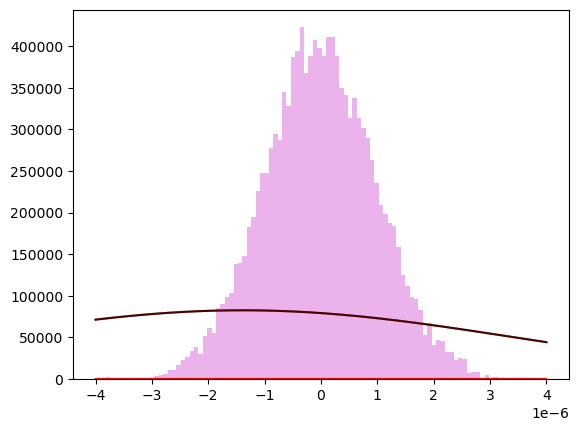

it  25,000 loss -12.572! loss val -12.679!
std 0.016820264980196953
old 8.718430064618588e-05
new 8.410132490098476e-05


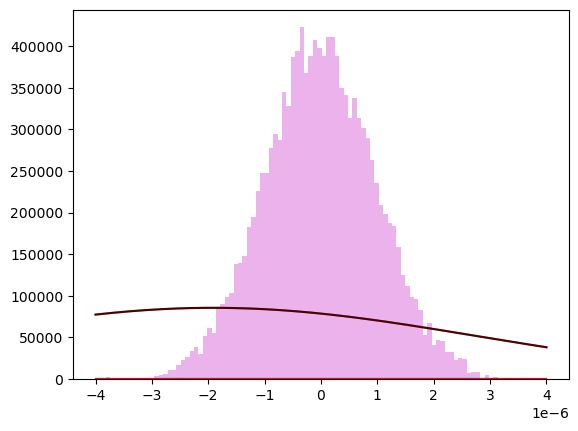

it  25,500 loss -12.599! loss val -12.670 
std 0.016241932287812233
old 8.410132490098476e-05
new 8.120966143906117e-05


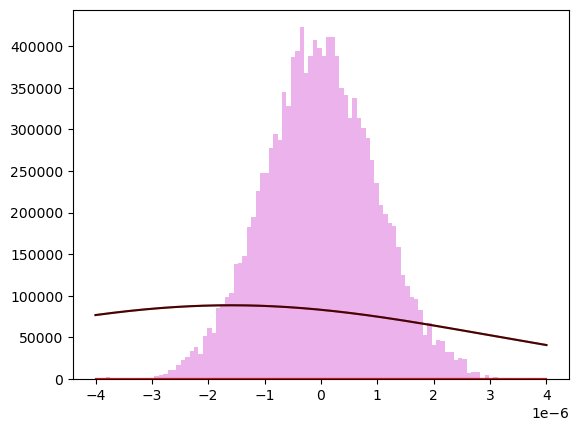

it  26,000 loss -12.639! loss val -12.725!
std 0.015698561444878578
old 8.120966143906117e-05
new 7.849280722439289e-05


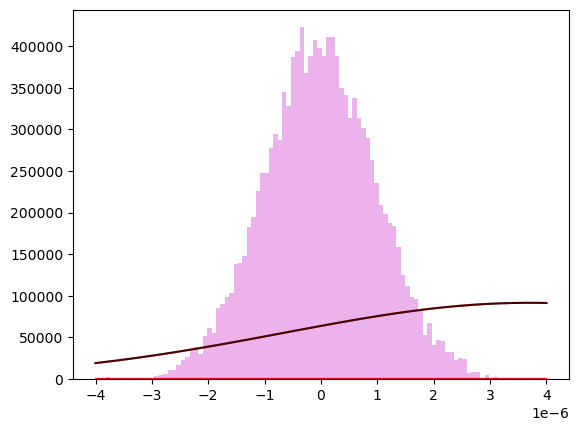

it  26,500 loss -12.651! loss val -12.455 
std 0.015187320299446583
old 7.849280722439289e-05
new 7.593660149723292e-05


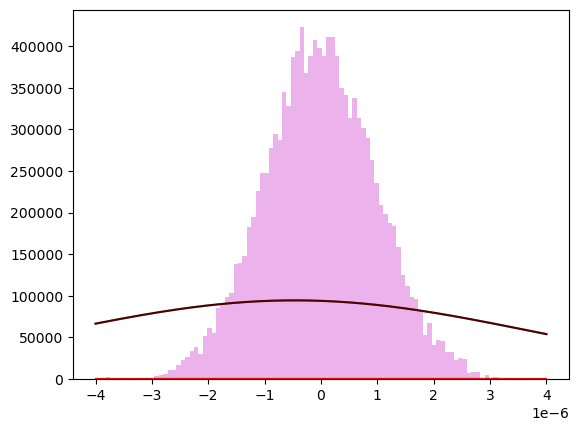

it  27,000 loss -12.706! loss val -12.842!
std 0.014706175774335861
old 7.593660149723292e-05
new 7.353087887167931e-05


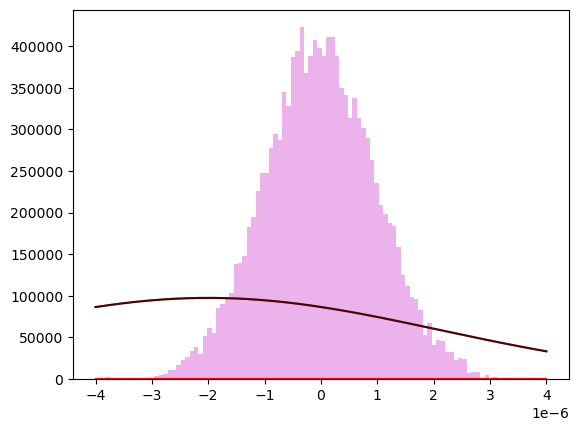

it  27,500 loss -12.730! loss val -12.760 
std 0.014251820743083954
old 7.353087887167931e-05
new 7.125910371541977e-05


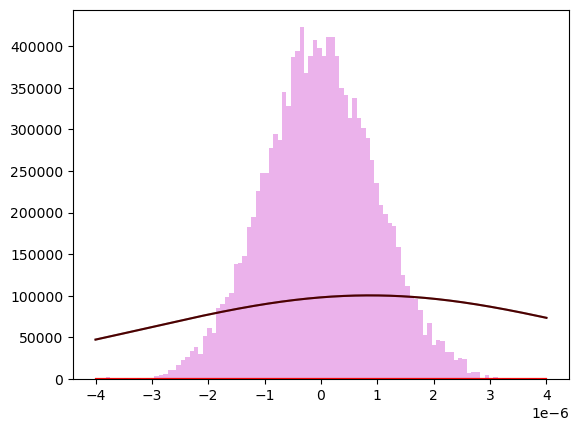

it  28,000 loss -12.754! loss val -12.881!
std 0.013823269866406918
old 7.125910371541977e-05
new 6.911634933203459e-05


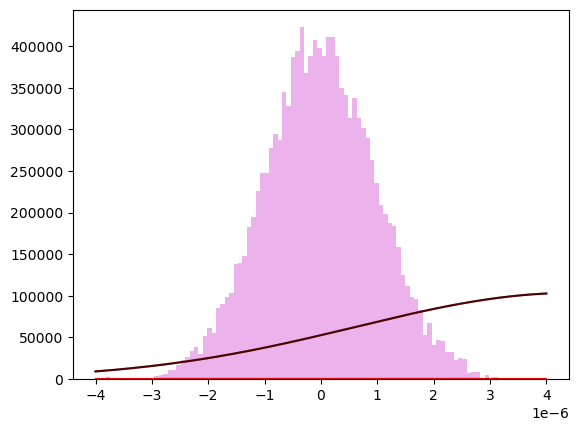

it  28,500 loss -12.782! loss val -12.256 
std 0.01341737899929285
old 6.911634933203459e-05
new 6.708689499646426e-05


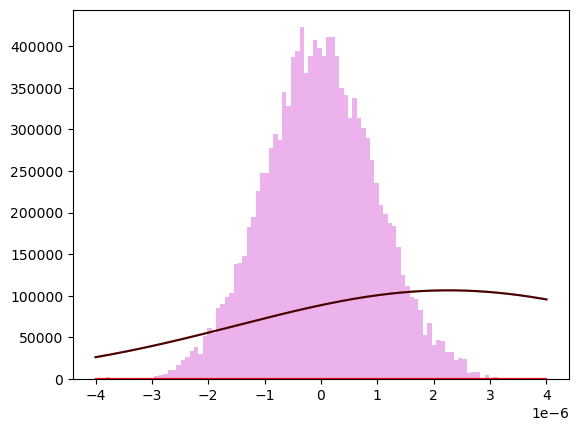

it  29,000 loss -12.806! loss val -12.776 
std 0.013032736256718636
old 6.708689499646426e-05
new 6.516368128359318e-05


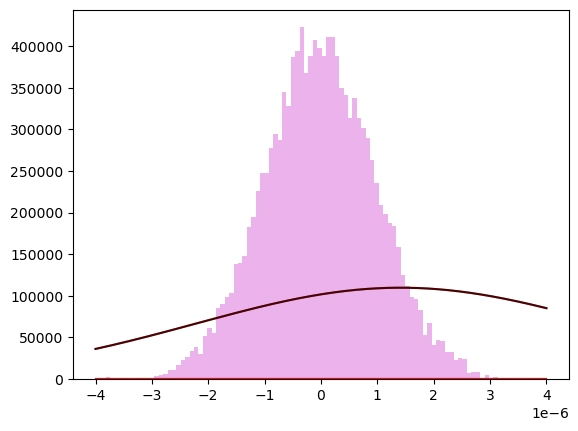

it  29,500 loss -12.844! loss val -12.911!
std 0.012668125331401825
old 6.516368128359318e-05
new 6.334062665700912e-05


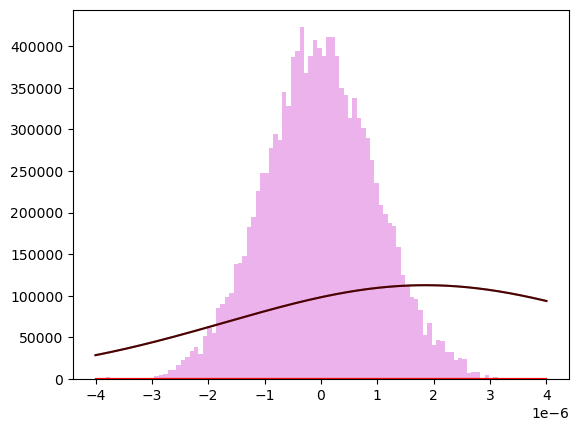

it  30,000 loss -12.862! loss val -12.874 
std 0.0123224426060915
old 6.334062665700912e-05
new 6.16122130304575e-05


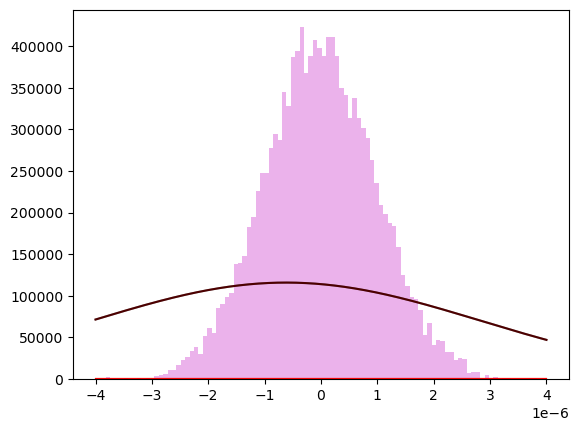

it  30,500 loss -12.895! loss val -13.022!
std 0.011994368396699429
old 6.16122130304575e-05
new 5.9971841983497144e-05


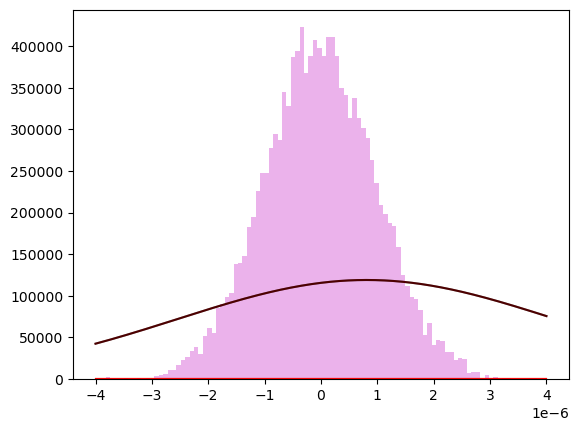

it  31,000 loss -12.917! loss val -13.032!
std 0.011681142263114452
old 5.9971841983497144e-05
new 5.840571131557226e-05


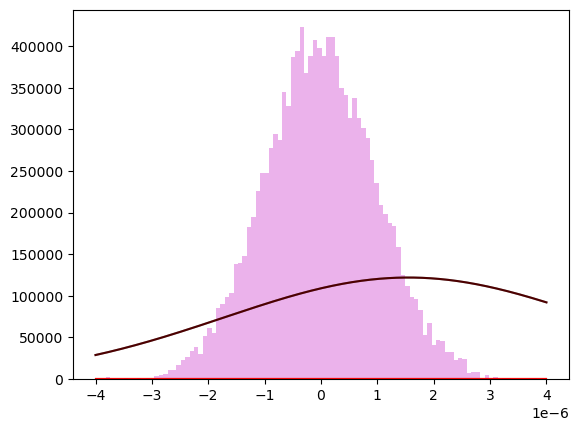

it  31,500 loss -12.924! loss val -12.970 
std 0.01138398703187704
old 5.840571131557226e-05
new 5.6919935159385206e-05


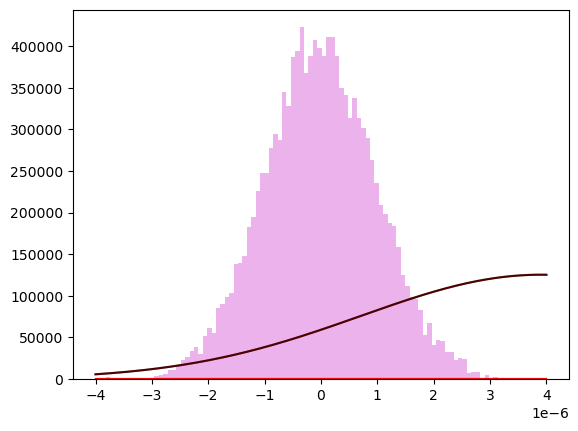

it  32,000 loss -12.985! loss val -12.355 
std 0.011099720373749733
old 5.6919935159385206e-05
new 5.549860186874866e-05


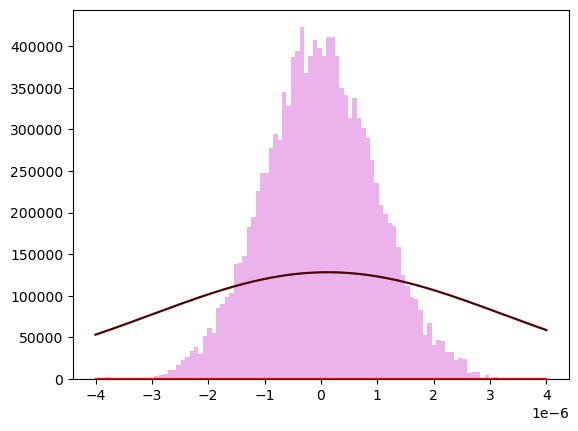

it  32,500 loss -12.979  loss val -13.130!
std 0.010829165577888489
old 5.549860186874866e-05
new 5.414582788944244e-05


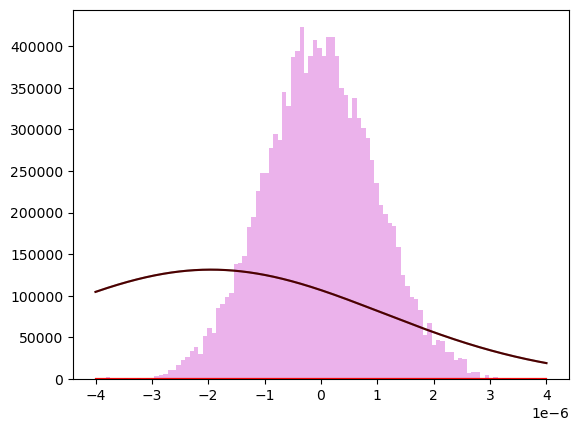

it  33,000 loss -13.007! loss val -12.948 
std 0.010571286082267761
old 5.414582788944244e-05
new 5.285643041133881e-05


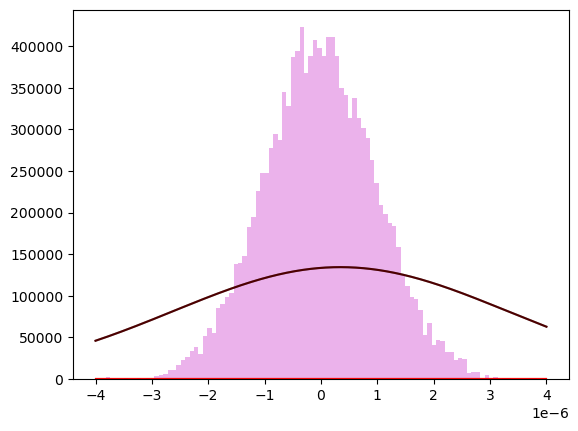

it  33,500 loss -13.026! loss val -13.165!
std 0.010324531234800816
old 5.285643041133881e-05
new 5.162265617400408e-05
stopping early, Saving parameters to checkpoint self.checkpoints["last"] and loading self.checkpoints["lowest_val_loss"]
std after weight_net tensor(4.1841, grad_fn=<StdBackward0>)
std after loc_net tensor(0.2972, grad_fn=<StdBackward0>)
std after logscale_net tensor(4.1562, grad_fn=<StdBackward0>)


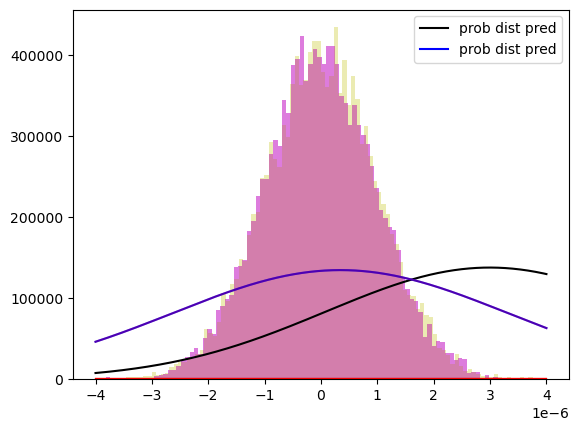

In [13]:
from metaSI.density_networks import Gaussian_mixture_network
from metaSI.data import get_nu_ny_and_auto_norm, Norm

def set_lr(optimizer, lr):
    for i, param_group in enumerate(optimizer.param_groups):
        print('old',param_group['lr'])
        param_group['lr'] = lr
        print('new',param_group['lr'])

def plot_during_training(loc, glob):
    ydist = loc['self'].get_dist(torch.zeros(1,0))[0]
    print('std',ydist.stddev.item()) #should be normed?
    lr_new = min(1,ydist.stddev.item()/0.2)*0.001
    set_lr(loc['self'].optimizer, lr_new)
    val_data = loc['self'].make_training_arrays(loc['val'], **loc['loss_kwargs_val'])

    ytest = torch.linspace(yminplot,ymaxplot,1000)

    plt.hist(yval,bins=int(Nb**0.5),density=True,alpha=0.3,color='m')
    yprob_pred = ydist.prob(ytest).detach().numpy() #.sample()
    yprob_weighted_pred = ydist.prob_per_weighted(ytest).detach().numpy() #.sample()
    plt.plot(ytest, yprob_pred,'k',label='prob dist pred')
    plt.plot(ytest, yprob_weighted_pred,'r',alpha=0.3)
    plt.show()
    return loc['self'].loss(*val_data, **loc['loss_kwargs_val']).item()


n_components = 10
weight_net_kwargs = {'bias_scale':1.0}
loc_net_kwargs = {'bias_scale':1.0}
logscale_net_kwargs = {'bias_scale':1.0}
from metaSI.data.norms import get_nu_ny_and_auto_norm

model = Gaussian_mixture_network(nz=0, ny=None, norm=Norm(),n_components=n_components,\
    weight_net_kwargs=weight_net_kwargs, loc_net_kwargs=loc_net_kwargs, logscale_net_kwargs=logscale_net_kwargs)
print('std before weight_net',torch.std(model.weight_net.net_lin.bias))
print('std before loc_net',torch.std(model.loc_net.net_lin.bias))
print('std before logscale_net',torch.std(model.logscale_net.net_lin.bias))
import pickle
load, name = False, f'models/thin-model-{sigma_y}'
if not load:
    optimizer = torch.optim.Adam(model.parameters())
    model.fit(train, val, iterations=50_000, print_freq=500, call_back_validation=plot_during_training)
    pickle.dump(model, open(name,'wb'))
else:
    model = pickle.load(open(name,'rb'))
print('std after weight_net',torch.std(model.weight_net.net_lin.bias))
print('std after loc_net',torch.std(model.loc_net.net_lin.bias))
print('std after logscale_net',torch.std(model.logscale_net.net_lin.bias))

ydist = model.get_dist(torch.zeros(1,0))[0]
ytest = torch.linspace(yminplot,ymaxplot,1000)
yprob_pred = ydist.prob(ytest).detach().numpy() #.sample()
yprob_weighted_pred = ydist.prob_per_weighted(ytest).detach().numpy() #.sample()
plt.plot(ytest, yprob_pred,'b',label='prob dist pred')
plt.plot(ytest, yprob_weighted_pred,'r',alpha=0.3)
# print(model, model.y0, model.ystd)
plt.hist(ytrain,bins=int(Nb**0.5),density=True,alpha=0.3,color='y')
plt.hist(yval,bins=int(Nb**0.5),density=True,alpha=0.3,color='m')
# dens1 = 1/(8/3)*(1-0.3)
# dens2 = 1/(8/3)*0.3
# plt.plot([yminplot,-4,-4,-4+8/3,-4+8/3,4-8/3,4-8/3,4,4,ymaxplot], [0,0,dens1,dens1,0,0,dens2,dens2,0,0],'k',label='True dist')
plt.legend()
plt.show()
# plt.plot(model.iteration_monitor,model.loss_train_monitor)
# plt.plot(model.iteration_monitor,model.loss_val_monitor)
# plt.grid()
# plt.show()


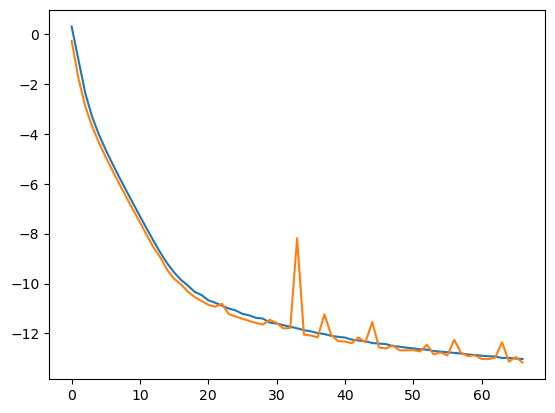

In [17]:
plt.plot(model.loss_train_monitor)
# plt.show()
plt.plot(model.loss_val_monitor)
plt.show()